# Notebook to Experiment with the data

## Imports

In [33]:
# Misc
import numpy as np
import random as rnd

# Look at .h5 files
import h5py

# Plotting
import matplotlib.pyplot as plt


## Load data

In [6]:
training_data_path = "../data/grimp/HS4_training_data_v01.h5"
noise_data_path = "../data/grimp/HS4_noise_event_data.h5"
noise_data = h5py.File(noise_data_path, "r")
training_data = h5py.File(training_data_path, "r")


## Examine Dataset

### Keys in the Dataset

In [7]:
print('Traning keys: {}'.format(list(training_data.keys())))
print('Noise keys: {}'.format(list(noise_data.keys())))


Traning keys: ['SNR', 'X', 'Y', 'dist', 'eve_id', 'mags']
Noise keys: ['SNR', 'X', 'Y', 'dist', 'eve_id', 'mags']


### Visualization Function

In [93]:
def visualize_data(data_set, filename):
  data = data_set['X']

  # Create figure and axis
  fig, axs = plt.subplots(nrows=6, ncols=3, sharex=True, sharey=True, figsize=(15, 10)) # figsize is in inches

  # Customize plots
  line_config = {'linewidth':'0.5'}

  # Create plots
  for i, j in np.ndindex(axs.shape):
    idx = rnd.randint(0, data.shape[0])
    axs[i][j].plot(data[idx], **line_config)

    # Customize
    ## Set title
    label = 'P' if data_set['Y'][idx]==1 else 'Noise'
    title = 'SNR: {}, Y: {}, dist: {}, eve_id: {}, mag: {}'.format(
      round(data_set['SNR'][idx], 1),
      label,
      round(data_set['dist'][idx], 1),
      data_set['eve_id'][idx],
      round(data_set['mags'][idx], 1),
    )
    axs[i][j].set_title(title, color='0.3', size='8')

    ## Add grid
    axs[i][j].grid(color='white')

    ## Remove ticks
    axs[i][j].tick_params(axis='both', bottom=False, left=False)

    ## Remove spines
    for s in axs[i][j].spines:
      axs[i][j].spines[s].set_visible(False)

    ## Set label color
    axs[i][j].tick_params(axis='both', colors='0.3')

    ## Add background color
    axs[i][j].set_facecolor('0.9')

  plt.savefig('../data_visualizations/{}'.format(filename))


### Training Data

In [15]:
for key in training_data.keys():
  print(training_data[key])


<HDF5 dataset "SNR": shape (34652,), type "<f8">
<HDF5 dataset "X": shape (34652, 801), type "<f8">
<HDF5 dataset "Y": shape (34652,), type "<i4">
<HDF5 dataset "dist": shape (34652,), type "<f8">
<HDF5 dataset "eve_id": shape (34652,), type "<i8">
<HDF5 dataset "mags": shape (34652,), type "<f8">


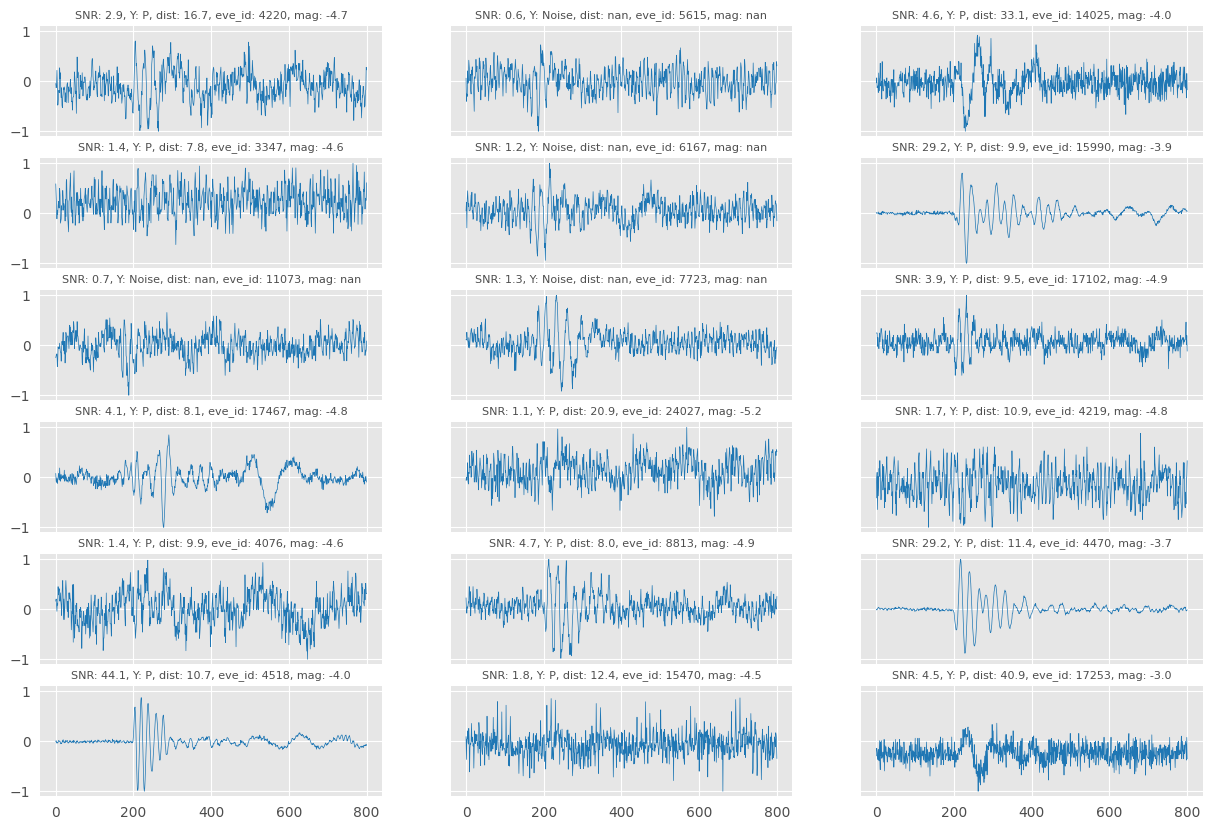

In [94]:
number = 1
visualize_data(training_data, 'training_data_{}.png'.format(number))


### Noise Data

In [18]:
for key in noise_data.keys():
  print(noise_data[key])


<HDF5 dataset "SNR": shape (122562,), type "<f8">
<HDF5 dataset "X": shape (122562, 801), type "<f8">
<HDF5 dataset "Y": shape (122562,), type "<i4">
<HDF5 dataset "dist": shape (122562,), type "<f8">
<HDF5 dataset "eve_id": shape (122562,), type "<i8">
<HDF5 dataset "mags": shape (122562,), type "<f8">


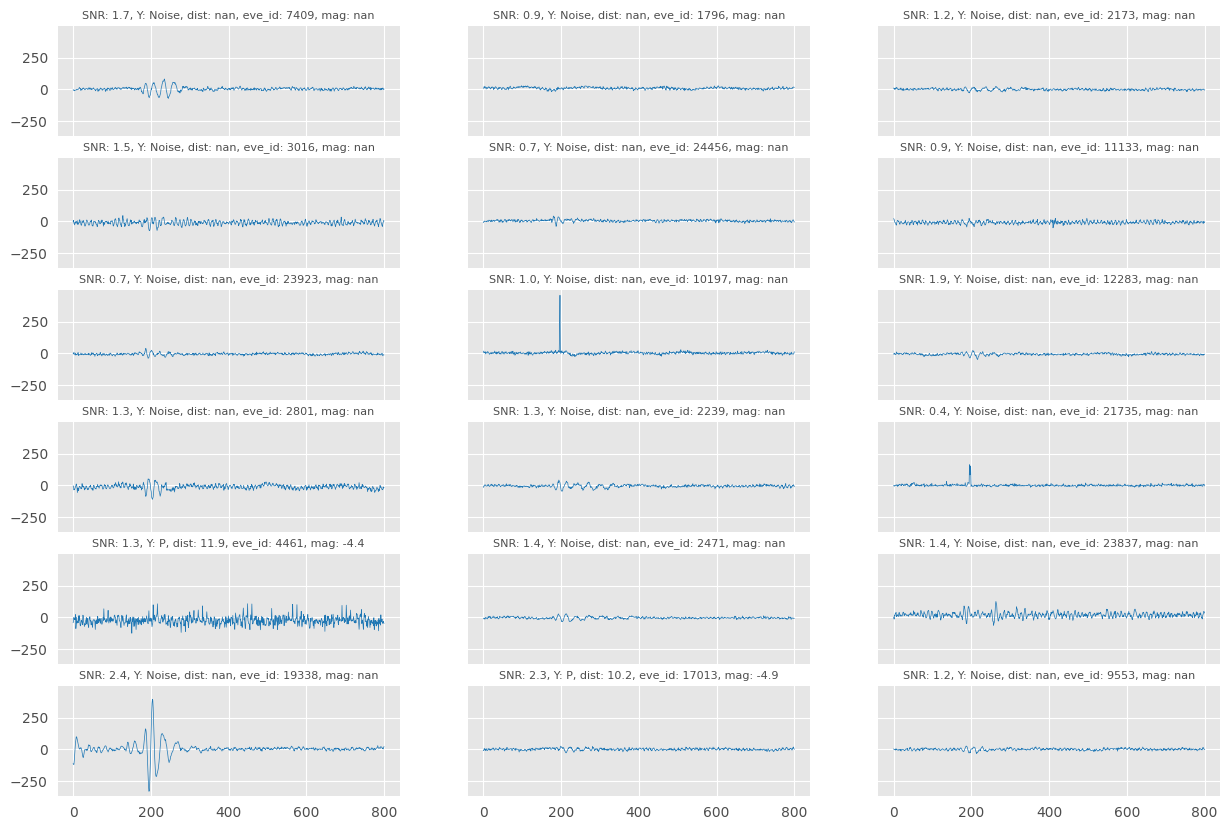

In [96]:
number = 1
visualize_data(noise_data, 'noise_data_{}.png'.format(number))
